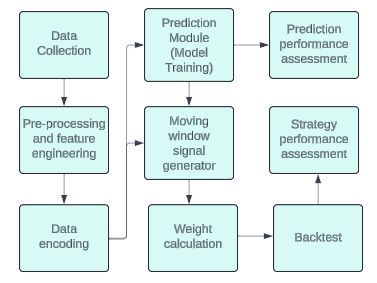

In [1]:
import sys
from pathlib import Path
parent_dir = Path().resolve().parent
sys.path.append(str(parent_dir))

In [2]:
from PreProcessing.Simple_preprocess import simple_data_prep
from PreProcessing.AutoEncoder import main_ae

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Read data

In [4]:
import pandas as pd
from pathlib import Path

# Define the absolute path
data_file = Path(r'C:\Users\peter\outs\onlyme\000. Reseach\000. Egyetem\2024tavasz\Selected\Deep_Index_Strategy_2\Data_collection\combined_data.csv')
data = pd.read_csv(data_file)


# 2. Preprocess Data

In [5]:
# the output of the function is  return  data, data_no_ret, data_no_vix, data_no_ret_vix
# extract all the tables
data, data_no_ret, data_no_vix, data_no_ret_vix = simple_data_prep(data)

# 4. Create Predictions Using the Autoencoded Features
## 4.1. VIX 

In [6]:
data_for_model=data.copy()
#SET DATE AS INDEX
data_for_model['Date'] = pd.to_datetime(data_for_model['Date'])
data_for_model.set_index('Date', inplace=True)


In [7]:
# REMOVE VIX
joined_data_autoencoded_data_for_vix_pred = data_for_model
joined_data_autoencoded_data_for_sp_pred = data_for_model


Early stopping at epoch 295 for CNN
Early stopping at epoch 41 for RNN
Early stopping at epoch 27 for GRU
Early stopping at epoch 228 for LSTM


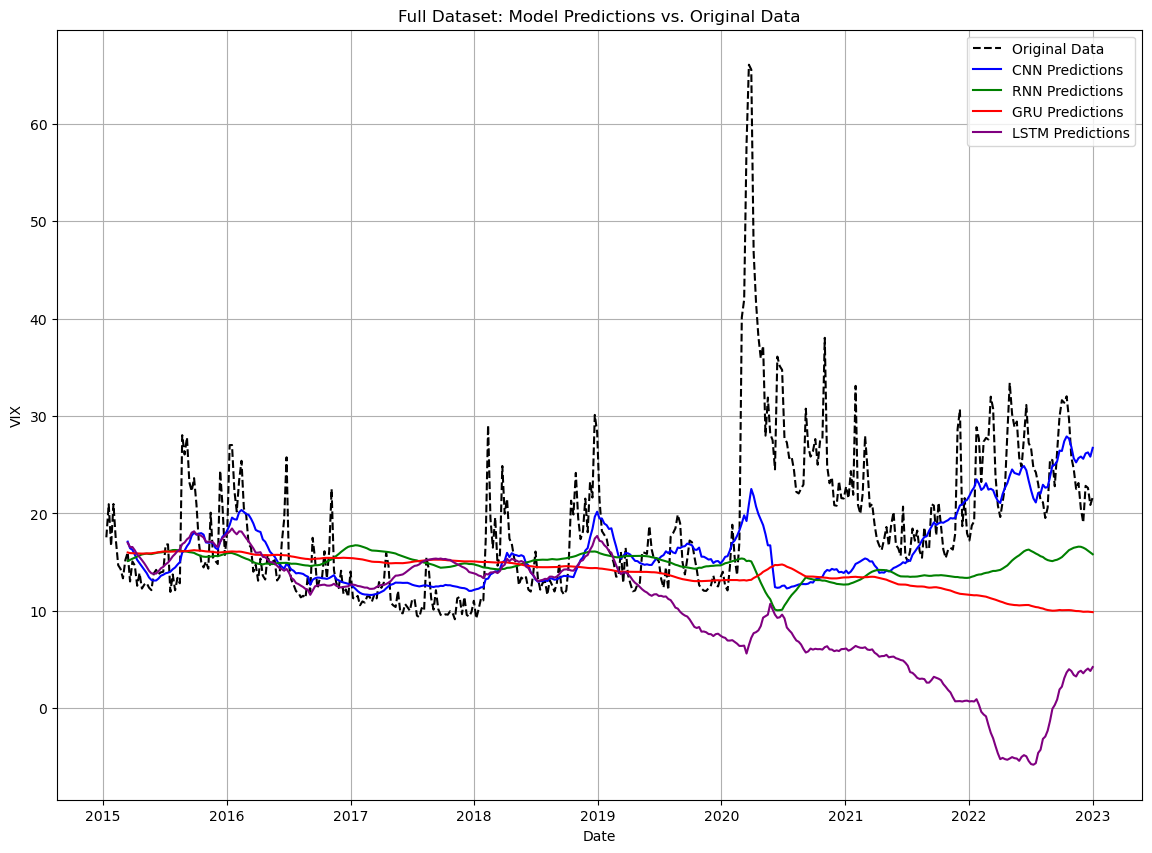

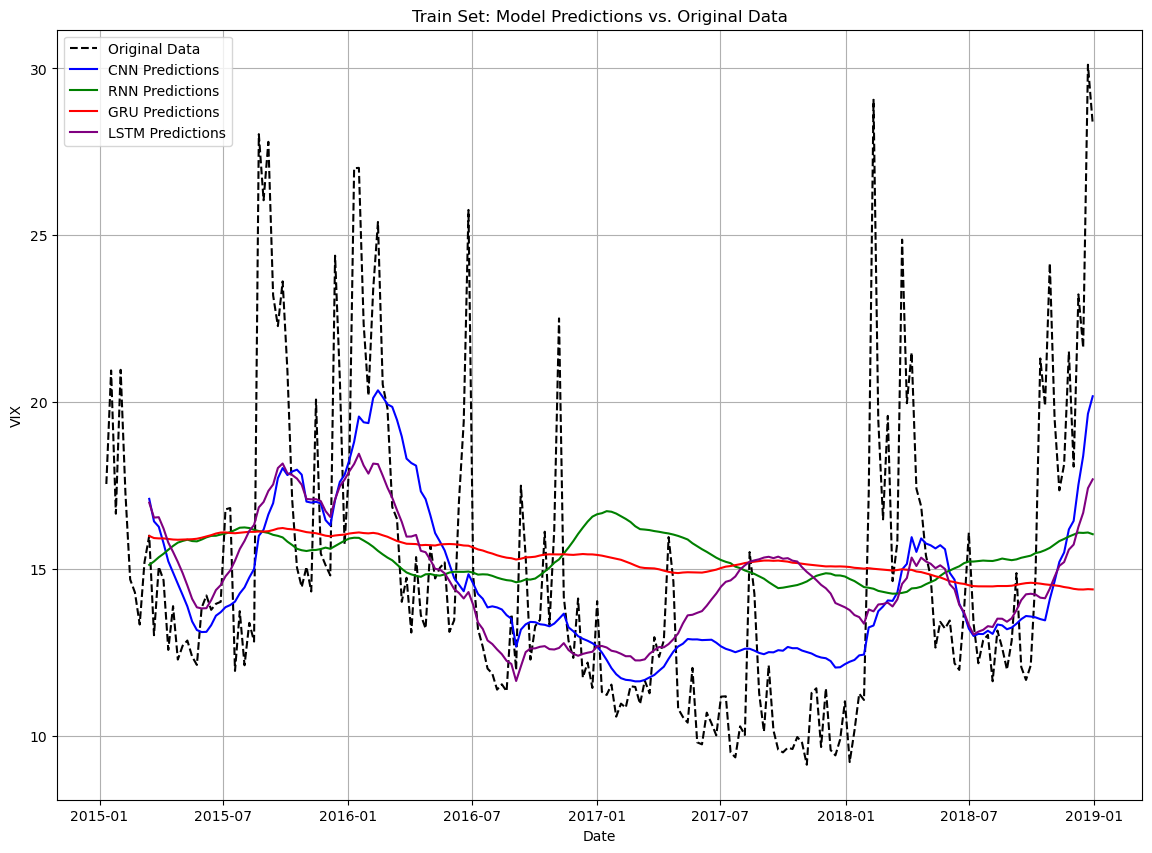

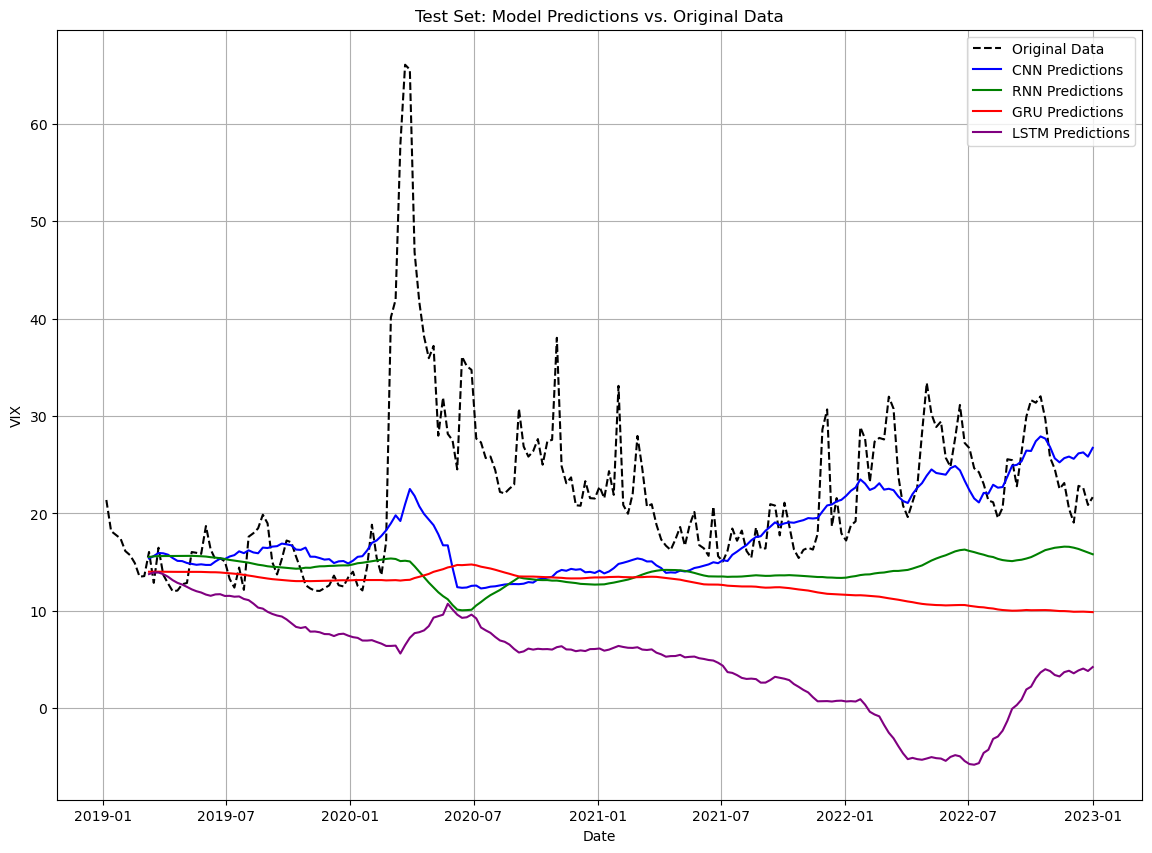

In [8]:
from Predictor_models.predictor_module import predictor_module

# Example usage
output_dir = "C:/Users/peter/outs/onlyme/000. Reseach/000. Egyetem/2024tavasz/Selected/Deep_Index_Strategy_2/0. Paper Folder/vix_prediction"
model_names = ['CNN', 'RNN', 'GRU', 'LSTM']
target_variable = 'VIX'

predictions_full_df_vix, predictions_train_df_vix, predictions_test_df_vix = predictor_module(
    joined_data_autoencoded_data_for_vix_pred, model_names, target_variable, output_dir
)



## 4.2. SP500

Early stopping at epoch 37 for CNN
Early stopping at epoch 32 for RNN
Early stopping at epoch 55 for GRU
Early stopping at epoch 65 for LSTM


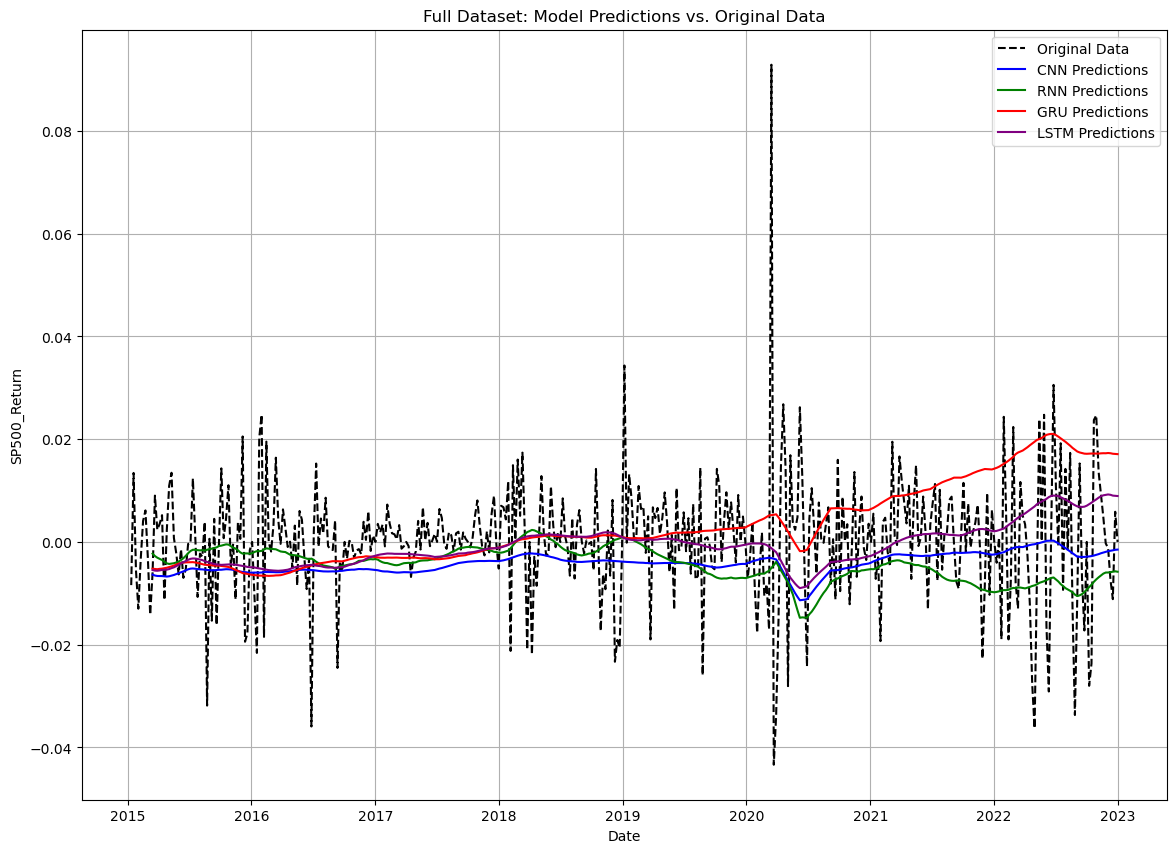

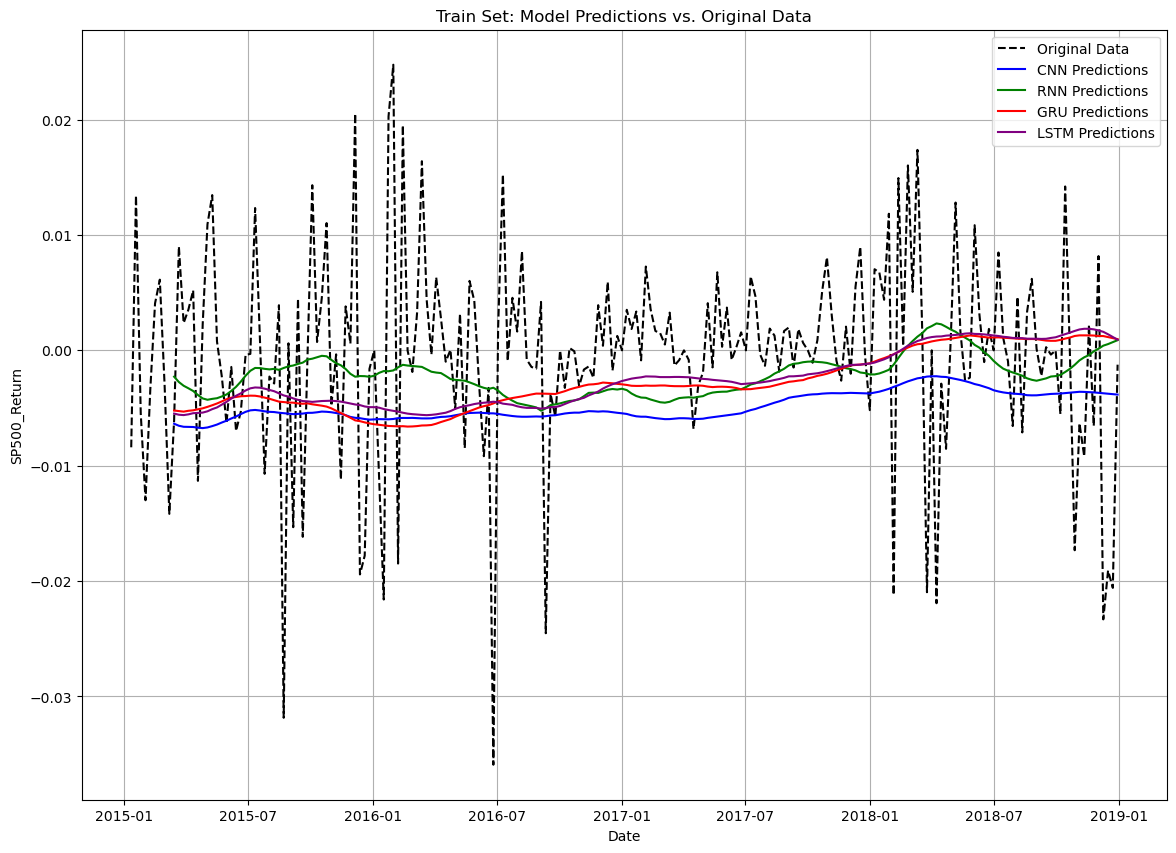

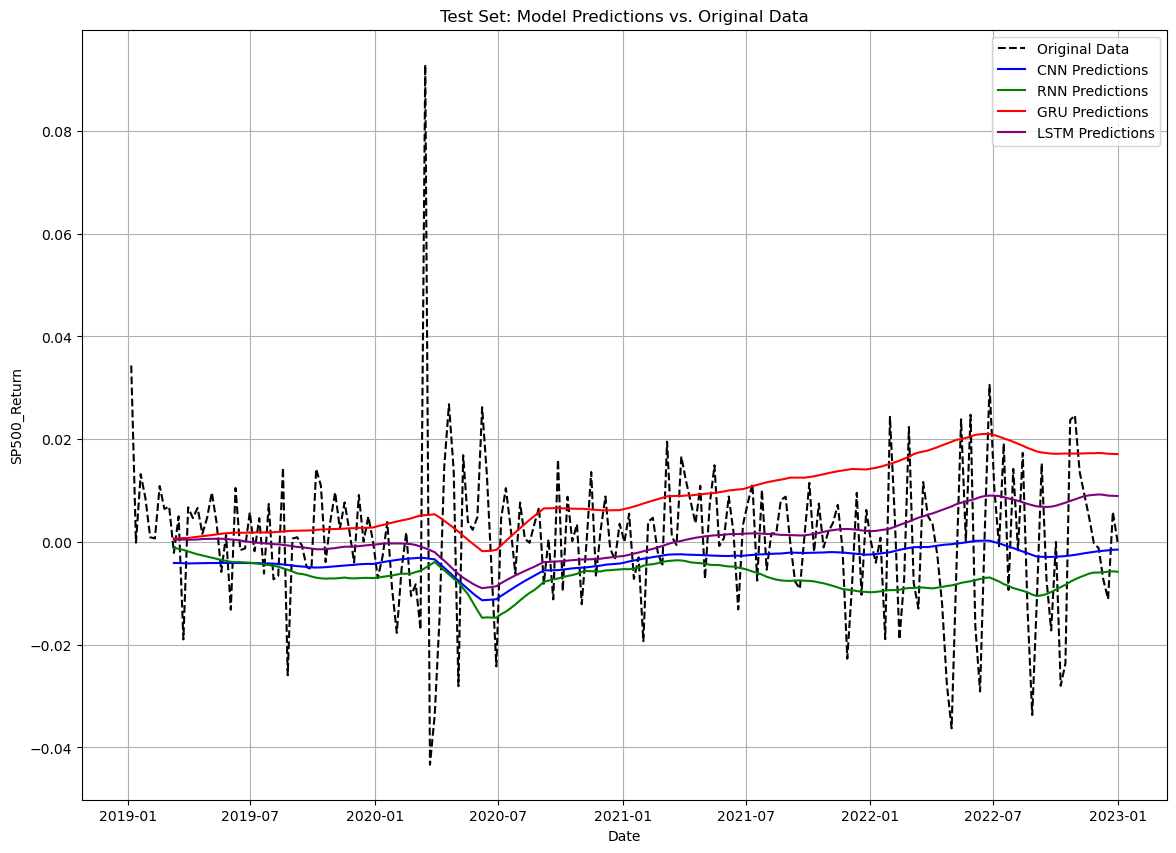

In [9]:
from Predictor_models.predictor_module import predictor_module

# Example usage
output_dir = "C:/Users/peter/outs/onlyme/000. Reseach/000. Egyetem/2024tavasz/Selected/Deep_Index_Strategy_2/0. Paper Folder/sp_prediction"
model_names = ['CNN', 'RNN', 'GRU', 'LSTM']
target_variable = 'SP500_Return'

predictions_full_df_sp, predictions_train_df_sp, predictions_test_df_sp = predictor_module(
    joined_data_autoencoded_data_for_sp_pred, model_names, target_variable, output_dir
)



# 5. Generate Trading Signals

## 5.1 Vol Strategy

In [10]:
# add sp to the column to make it processable for the signal generatol predictions_full_df_vix, predictions_train_df_vix, predictions_test_df_vix
predictions_full_df_vix['SP500_Return'] = predictions_full_df_sp['Real']
predictions_train_df_vix['SP500_Return'] = predictions_train_df_sp['Real']
predictions_test_df_vix['SP500_Return'] = predictions_test_df_sp['Real']

In [11]:
from Signal_Generator.signal_generator import generate_signal_table_vol
from Signal_Generator.signal_generator import plot_signals_vol

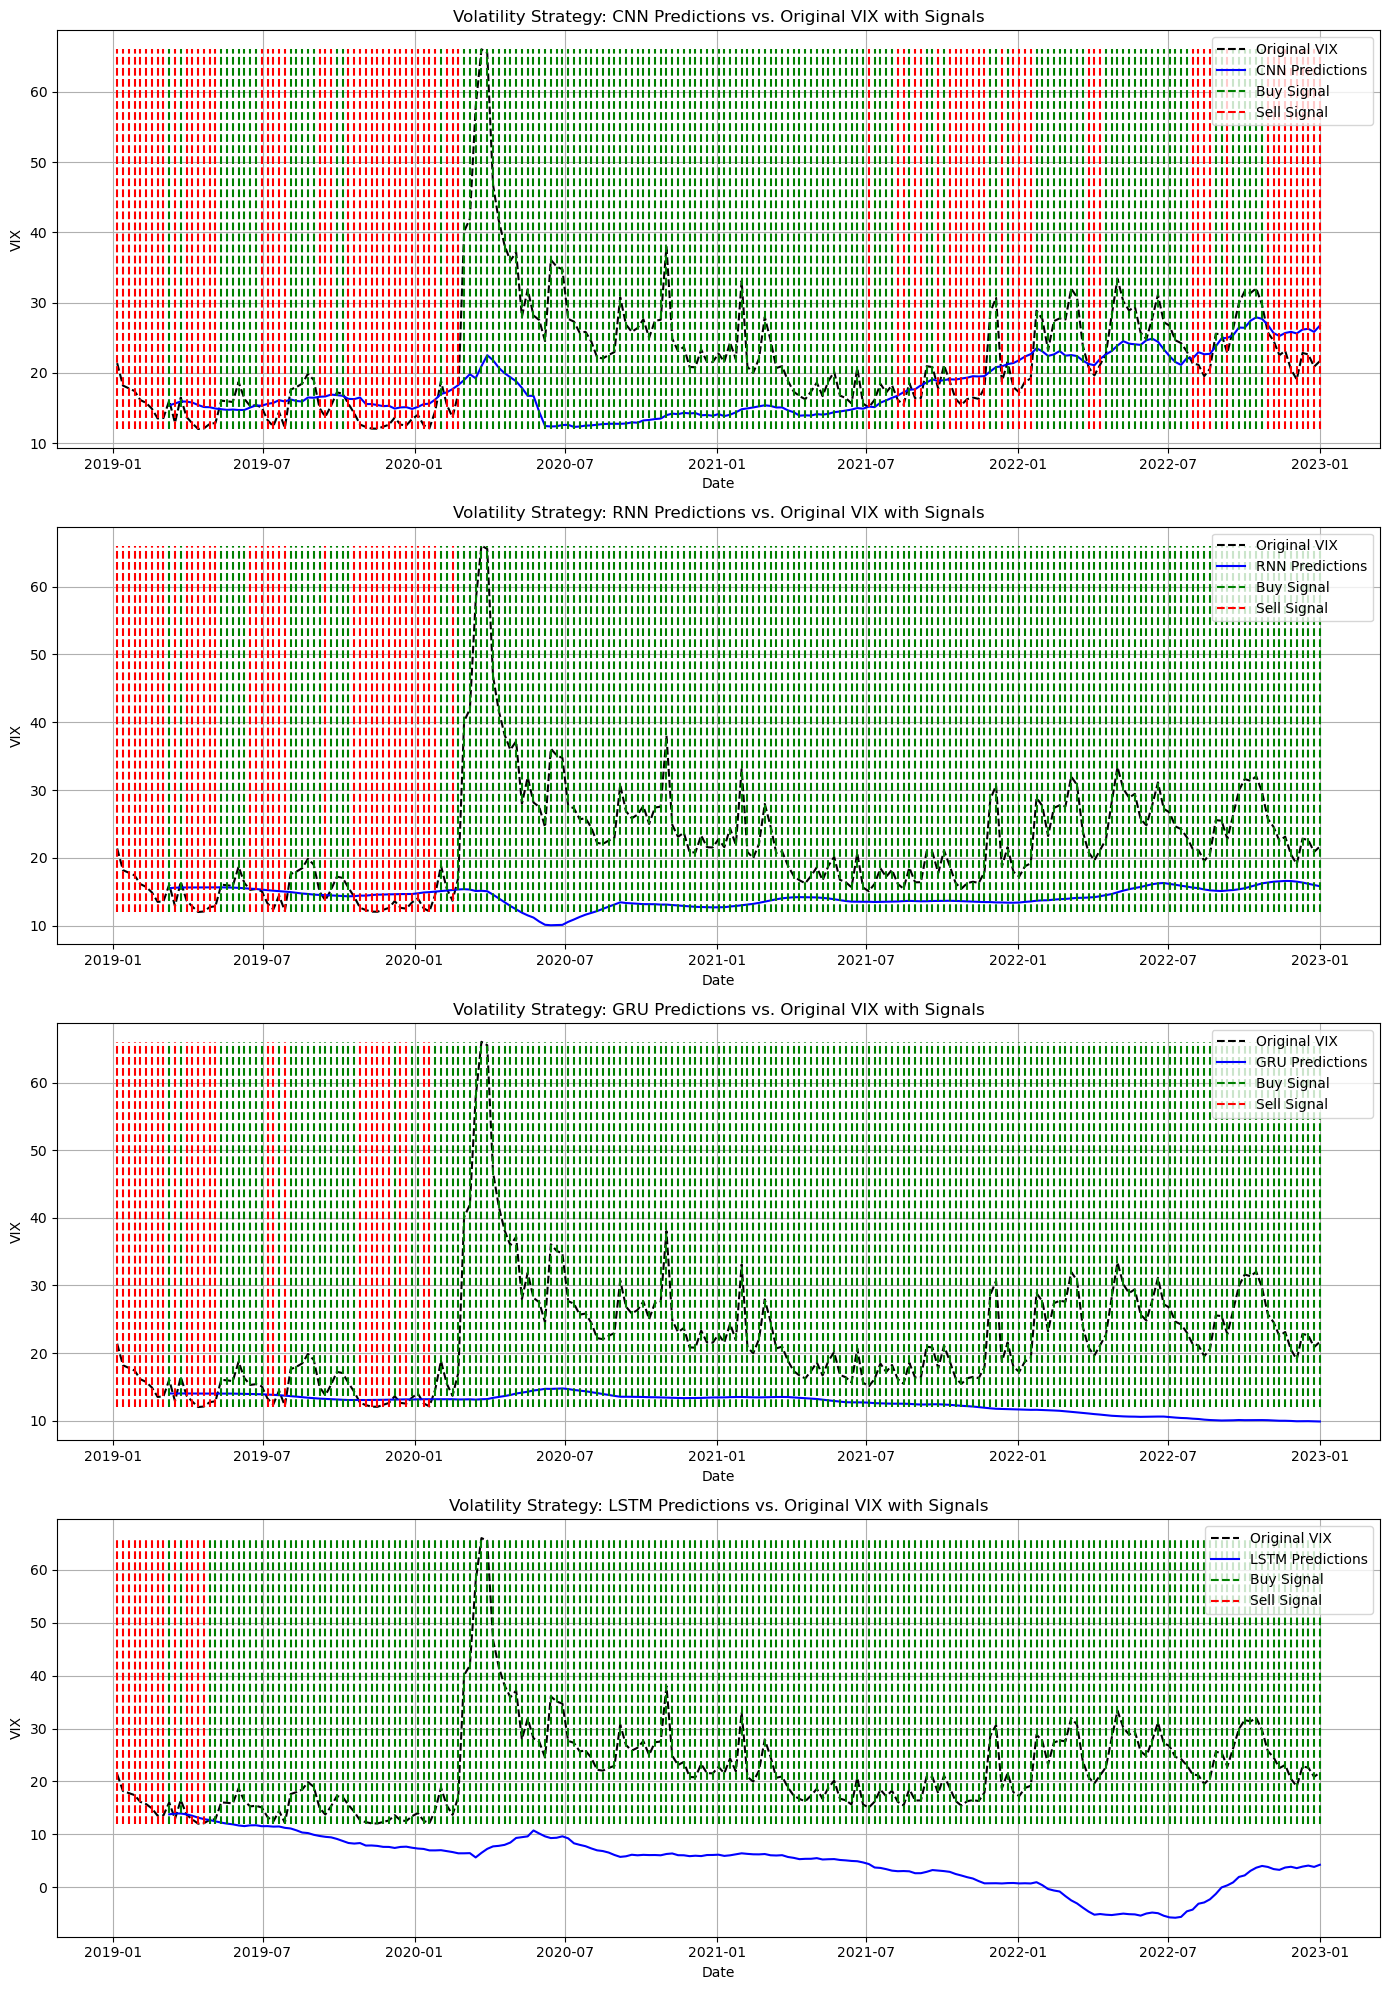

In [12]:
output_dir = "C:/Users/peter/outs/onlyme/000. Reseach/000. Egyetem/2024tavasz/Selected/Deep_Index_Strategy_2/0. Paper Folder/vix_signals"
model_names = ['CNN', 'RNN', 'GRU', 'LSTM']

# Generate signal tables for both strategies
signal_table_vol = generate_signal_table_vol(predictions_test_df_vix)


# Plot signals for Volatility strategy
plot_signals_vol(predictions_test_df_vix, signal_table_vol, model_names, output_dir)




## 5.2 SP Strategy

In [13]:
from Signal_Generator.signal_generator import generate_signal_table_sp500
from Signal_Generator.signal_generator import plot_signals_sp500

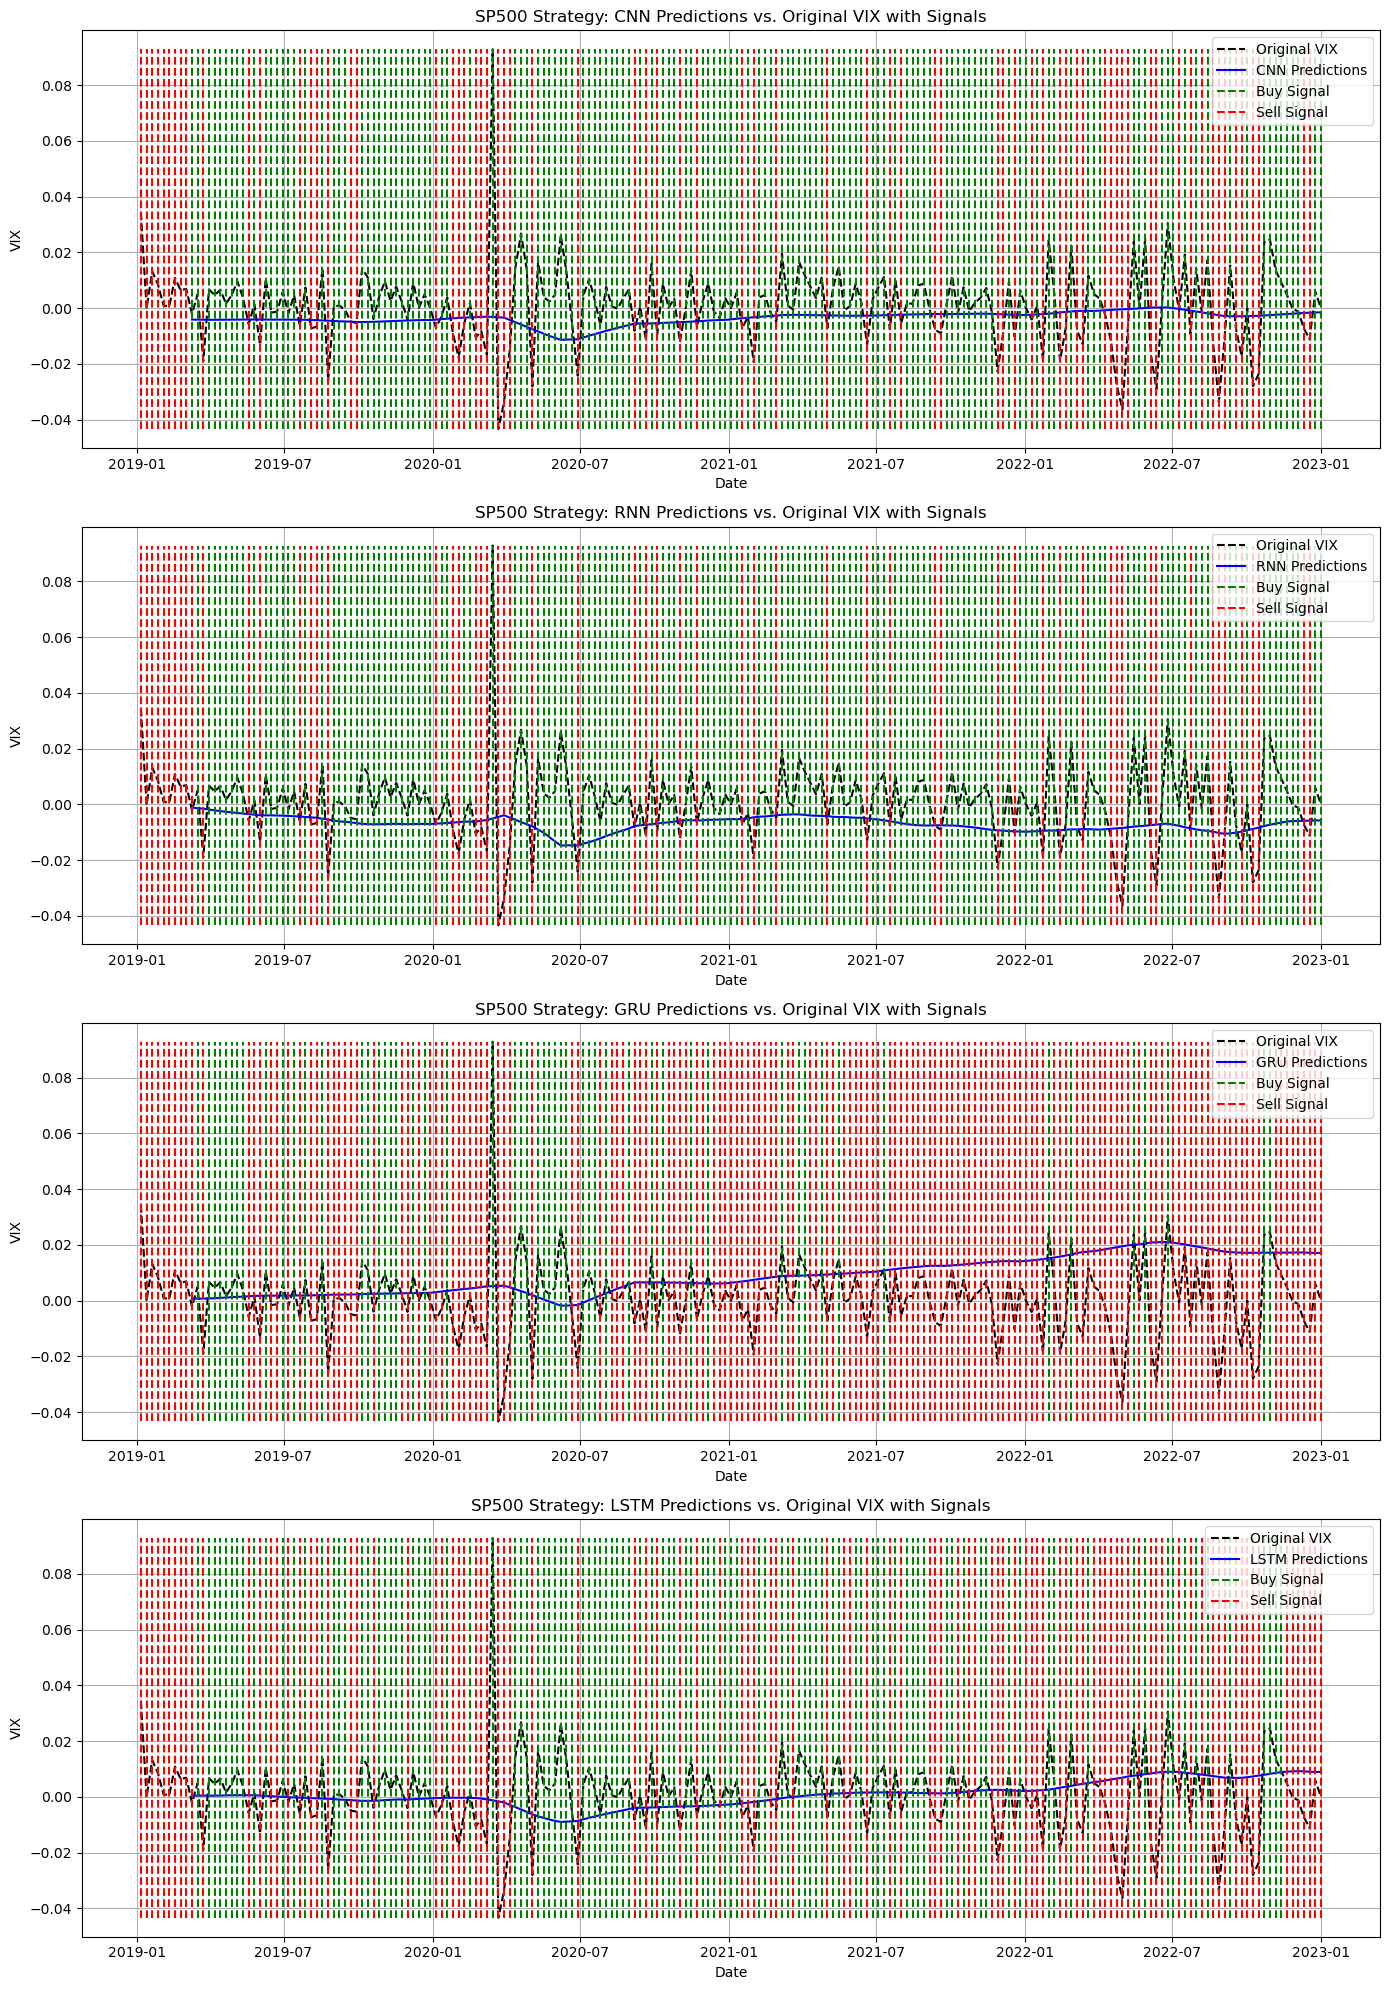

In [14]:
output_dir = "C:/Users/peter/outs/onlyme/000. Reseach/000. Egyetem/2024tavasz/Selected/Deep_Index_Strategy_2/0. Paper Folder/sp_signals"
model_names = ['CNN', 'RNN', 'GRU', 'LSTM']

# Generate signal tables for both strategies
signal_table_sp = generate_signal_table_vol(predictions_test_df_sp)


# Plot signals for Volatility strategy
plot_signals_sp500(predictions_test_df_sp, signal_table_sp, model_names, output_dir)


# 6. Comined Strategies

## 6.1 VIX

In [15]:
from Signal_Generator.signal_generator import generate_majority_signal_table


model_names = ['CNN', 'RNN', 'GRU', 'LSTM']
signal_column_name = 'vix_combined_signal'

vix_majority_signal_table = generate_majority_signal_table(signal_table_vol, model_names, signal_column_name)
print(vix_majority_signal_table)

           vix_combined_signal       Real  SP500_Return
Date                                                   
2019-01-06                Sell  21.379999  3.433571e-02
2019-01-13                Sell  18.190001 -1.462978e-04
2019-01-20                Sell  17.799999  1.318305e-02
2019-01-27                Sell  17.420000  8.488694e-03
2019-02-03                Sell  16.139999  8.986104e-04
...                        ...        ...           ...
2022-12-04                 Buy  19.059999 -1.194661e-03
2022-12-11                 Buy  22.830000 -7.349578e-03
2022-12-18                 Buy  22.620001 -1.113775e-02
2022-12-25                 Buy  20.870001  5.868103e-03
2023-01-01                 Buy  21.670000 -5.178249e-11

[209 rows x 3 columns]


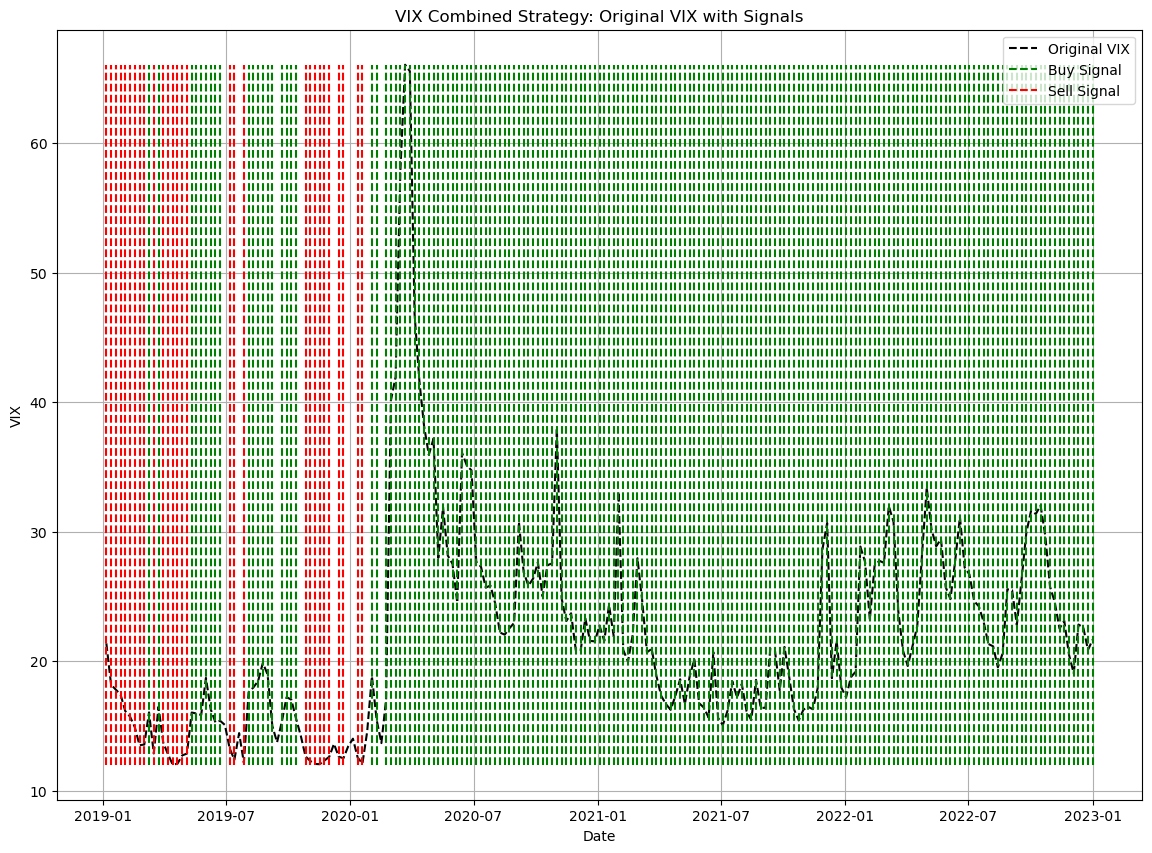

In [16]:
from Signal_Generator.signal_generator import plot_vix_combined_signal
output_dir = "C:/Users/peter/outs/onlyme/000. Reseach/000. Egyetem/2024tavasz/Selected/Deep_Index_Strategy_2/0. Paper Folder/vix_signals"
# Plot VIX combined signals
plot_vix_combined_signal(vix_majority_signal_table, output_dir)

## 6.2 SP

In [17]:
from Signal_Generator.signal_generator import generate_majority_signal_table
model_names = ['CNN', 'RNN', 'GRU', 'LSTM']
signal_column_name = 'sp_combined_signal'

sp_majority_signal_table = generate_majority_signal_table(signal_table_sp, model_names, signal_column_name)
print(sp_majority_signal_table)

           sp_combined_signal          Real
Date                                       
2019-01-06               Sell  3.433571e-02
2019-01-13               Sell -1.462978e-04
2019-01-20               Sell  1.318305e-02
2019-01-27               Sell  8.488694e-03
2019-02-03               Sell  8.986104e-04
...                       ...           ...
2022-12-04               Hold -1.194661e-03
2022-12-11               Sell -7.349578e-03
2022-12-18               Sell -1.113775e-02
2022-12-25               Hold  5.868103e-03
2023-01-01               Hold -5.178249e-11

[209 rows x 2 columns]


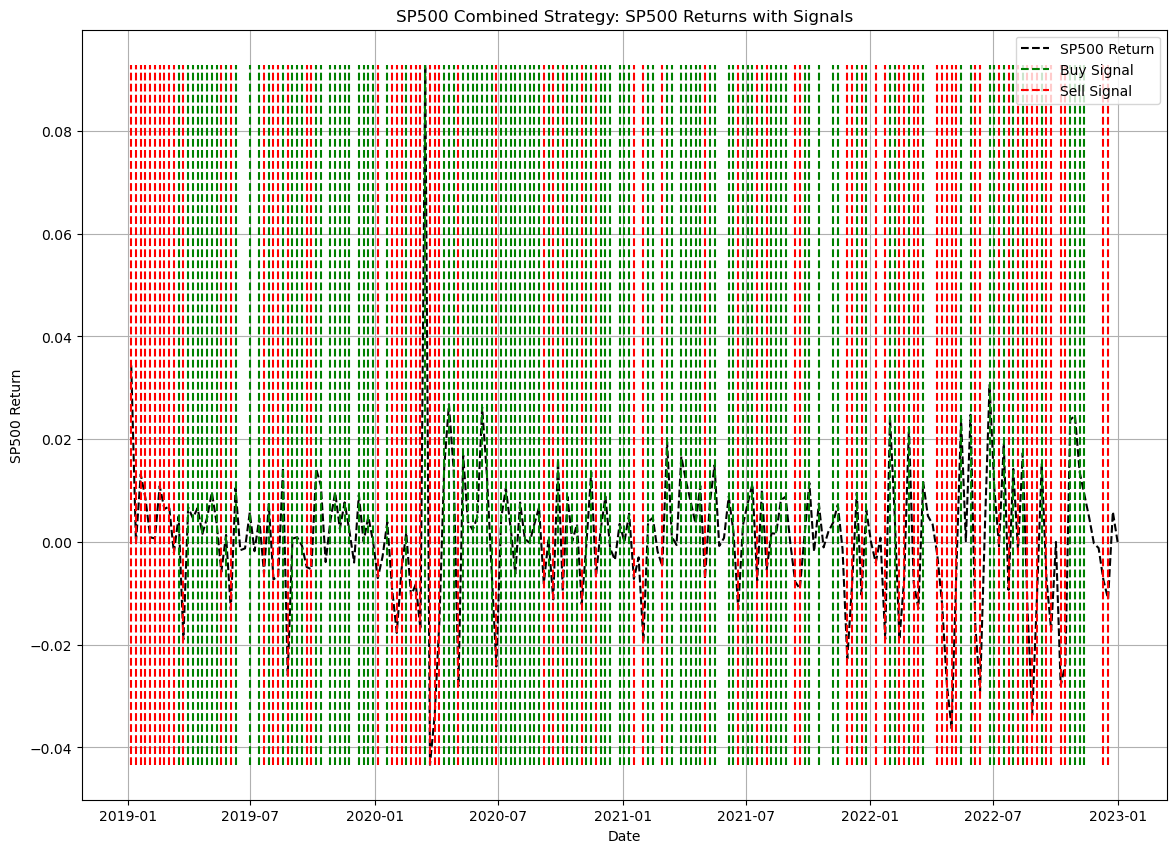

In [18]:
from Signal_Generator.signal_generator import plot_sp500_combined_signal
output_dir = "C:/Users/peter/outs/onlyme/000. Reseach/000. Egyetem/2024tavasz/Selected/Deep_Index_Strategy_2/0. Paper Folder/sp_signals"
plot_sp500_combined_signal(sp_majority_signal_table, output_dir)

# 6.2 Common Vote Combination 

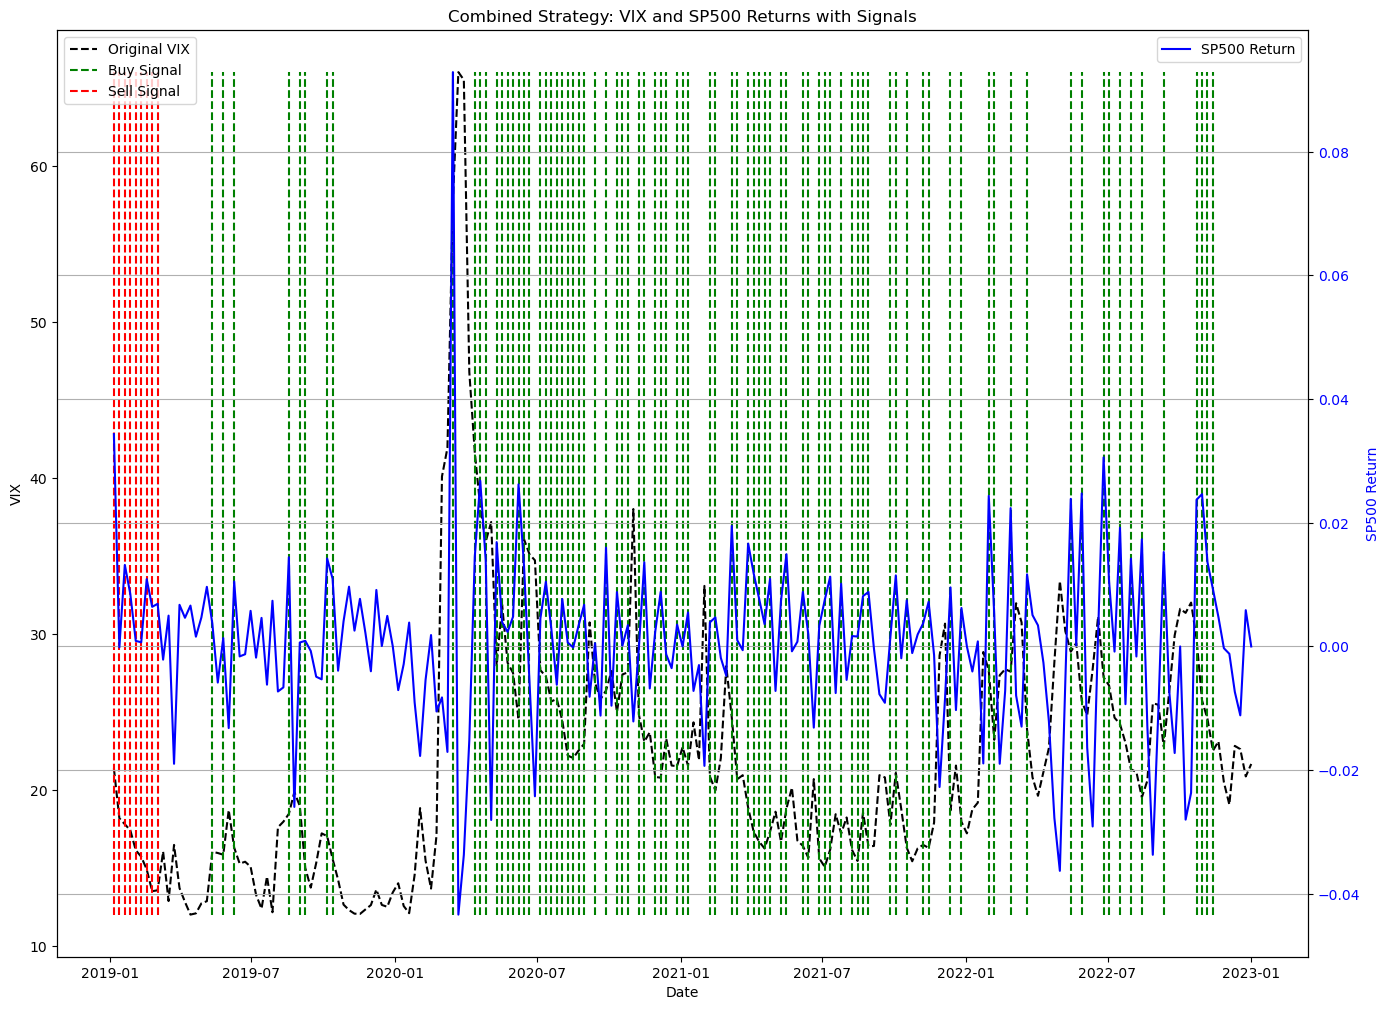

In [19]:
from Signal_Generator.signal_generator import combine_and_plot_signals

output_dir = "C:/Users/peter/outs/onlyme/000. Reseach/000. Egyetem/2024tavasz/Selected/Deep_Index_Strategy_2/0. Paper Folder/all_combined_signals"
combined_signal_table = combine_and_plot_signals(vix_majority_signal_table, sp_majority_signal_table, output_dir)


In [20]:
vix_majority_signal_table

,vix_combined_signal,Real,SP500_Return
Date,,,
2019-01-06,Sell,21.379999,3.433571e-02
2019-01-13,Sell,18.190001,-1.462978e-04
2019-01-20,Sell,17.799999,1.318305e-02
2019-01-27,Sell,17.420000,8.488694e-03
2019-02-03,Sell,16.139999,8.986104e-04
...,...,...,...
2022-12-04,Buy,19.059999,-1.194661e-03
2022-12-11,Buy,22.830000,-7.349578e-03
2022-12-18,Buy,22.620001,-1.113775e-02


In [21]:
combined_signal_table

,combined_signal,Real_VIX,Real_SP500
Date,,,
2019-01-06,Sell,21.379999,3.433571e-02
2019-01-13,Sell,18.190001,-1.462978e-04
2019-01-20,Sell,17.799999,1.318305e-02
2019-01-27,Sell,17.420000,8.488694e-03
2019-02-03,Sell,16.139999,8.986104e-04
...,...,...,...
2022-12-04,Hold,19.059999,-1.194661e-03
2022-12-11,Hold,22.830000,-7.349578e-03
2022-12-18,Hold,22.620001,-1.113775e-02


# 7. Backtest

## 7.1 Simple Strategies

In [22]:
signal_table_sp 

,CNN_Signal,RNN_Signal,GRU_Signal,LSTM_Signal,Real
Date,,,,,
2019-01-06,Sell,Sell,Sell,Sell,3.433571e-02
2019-01-13,Sell,Sell,Sell,Sell,-1.462978e-04
2019-01-20,Sell,Sell,Sell,Sell,1.318305e-02
2019-01-27,Sell,Sell,Sell,Sell,8.488694e-03
2019-02-03,Sell,Sell,Sell,Sell,8.986104e-04
...,...,...,...,...,...
2022-12-04,Buy,Buy,Sell,Sell,-1.194661e-03
2022-12-11,Sell,Sell,Sell,Sell,-7.349578e-03
2022-12-18,Sell,Sell,Sell,Sell,-1.113775e-02


[*********************100%%**********************]  1 of 1 completed


Signal DataFrame head:
            CNN_Signal RNN_Signal GRU_Signal LSTM_Signal      Real
Date                                                             
2019-01-06       Sell       Sell       Sell        Sell  0.034336
2019-01-13       Sell       Sell       Sell        Sell -0.000146
2019-01-20       Sell       Sell       Sell        Sell  0.013183
2019-01-27       Sell       Sell       Sell        Sell  0.008489
2019-02-03       Sell       Sell       Sell        Sell  0.000899
SP500 Returns DataFrame head:
             SP500_Return
Date                    
2010-01-10      0.002636
2010-01-17     -0.001541
2010-01-24     -0.009796
2010-01-31     -0.003274
2010-02-07     -0.001296
Signal DataFrame Date Range:  2019-01-06 00:00:00  to  2023-01-01 00:00:00
SP500 Returns DataFrame Date Range:  2010-01-10 00:00:00  to  2023-01-01 00:00:00
Combined DataFrame head after join:
            CNN_Signal RNN_Signal GRU_Signal LSTM_Signal      Real  \
Date                                         

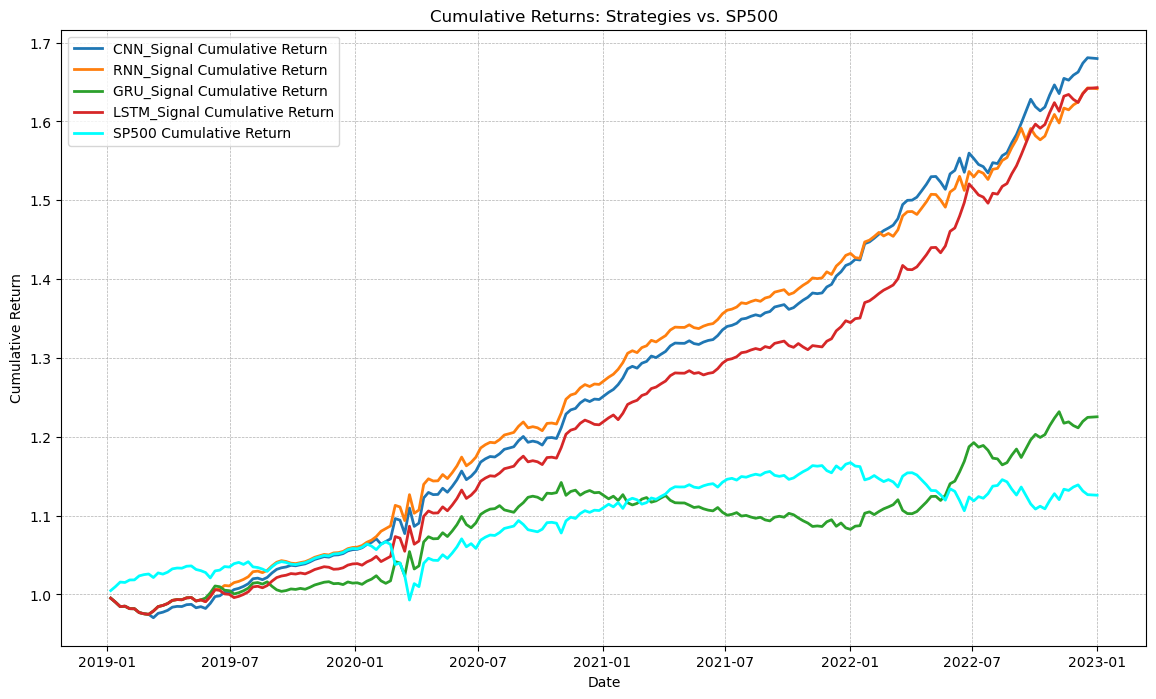

            Cumulative_Strategy_Return  Cumulative_SP500_Return
Date                                                           
2019-01-06                    0.995165                 1.004835
2019-01-13                    0.990154                 1.009895
2019-01-20                    0.984518                 1.015643
2019-01-27                    0.985033                 1.015112
2019-02-03                    0.981931                 1.018308
             Annualized Return  Sharpe Ratio  Information Ratio  Max Drawdown
CNN_Signal            0.868897      9.751740           3.793059     -0.024874
RNN_Signal            0.817682      9.099047           3.664366     -0.020959
GRU_Signal            0.277621      2.882937           0.640020     -0.052076
LSTM_Signal           0.819525      9.122301           3.387883     -0.020959


In [23]:
from BackTest.BackTest import backtest_strategy
import yfinance as yf

# Set the date range
start_date = '2010-01-01'
end_date = '2023-01-01'
def download_sp500_data(start_date, end_date):
    # Download S&P 500 data from Yahoo Finance
    sp500 = yf.download('^GSPC', start=start_date, end=end_date)
    return sp500

def calculate_returns(sp500_data):
    # Calculate daily returns
    sp500_data['Return'] = sp500_data['Adj Close'].pct_change()
    return sp500_data

# Download and process S&P 500 data
sp500_data = download_sp500_data(start_date, end_date)
sp500_data = calculate_returns(sp500_data)

# Drop NaN values and rename the column to SP500_Return
returns = sp500_data[['Return']].dropna().rename(columns={'Return': 'SP500_Return'})
# conver to weekly
returns = returns.resample('W').mean()

output_dir = "C:/Users/peter/outs/onlyme/000. Reseach/000. Egyetem/2024tavasz/Selected/Deep_Index_Strategy_2/0. Paper Folder/backtest_results"
os.makedirs(output_dir, exist_ok=True)

signal_names = ['CNN_Signal', 'RNN_Signal', 'GRU_Signal', 'LSTM_Signal']  # Add more signal names if available
cumulative_returns_df, performance_metrics_df = backtest_strategy(signal_table_sp, returns, signal_names, output_dir)
print(cumulative_returns_df.head())
print(performance_metrics_df)


## 7.2 simple Backtest vol

In [24]:
signal_table_vol

,CNN_Signal,RNN_Signal,GRU_Signal,LSTM_Signal,Real,SP500_Return
Date,,,,,,
2019-01-06,Sell,Sell,Sell,Sell,21.379999,3.433571e-02
2019-01-13,Sell,Sell,Sell,Sell,18.190001,-1.462978e-04
2019-01-20,Sell,Sell,Sell,Sell,17.799999,1.318305e-02
2019-01-27,Sell,Sell,Sell,Sell,17.420000,8.488694e-03
2019-02-03,Sell,Sell,Sell,Sell,16.139999,8.986104e-04
...,...,...,...,...,...,...
2022-12-04,Sell,Buy,Buy,Buy,19.059999,-1.194661e-03
2022-12-11,Sell,Buy,Buy,Buy,22.830000,-7.349578e-03
2022-12-18,Sell,Buy,Buy,Buy,22.620001,-1.113775e-02


[*********************100%%**********************]  1 of 1 completed

Signal DataFrame head:
            CNN_Signal RNN_Signal GRU_Signal LSTM_Signal      Real
Date                                                             
2019-01-06       Sell       Sell       Sell        Sell  0.034336
2019-01-13       Sell       Sell       Sell        Sell -0.000146
2019-01-20       Sell       Sell       Sell        Sell  0.013183
2019-01-27       Sell       Sell       Sell        Sell  0.008489
2019-02-03       Sell       Sell       Sell        Sell  0.000899
SP500 Returns DataFrame head:
             SP500_Return
Date                    
2010-01-10      0.002636
2010-01-17     -0.001541
2010-01-24     -0.009796
2010-01-31     -0.003274
2010-02-07     -0.001296
Signal DataFrame Date Range:  2019-01-06 00:00:00  to  2023-01-01 00:00:00
SP500 Returns DataFrame Date Range:  2010-01-10 00:00:00  to  2023-01-01 00:00:00
Combined DataFrame head after join:
            CNN_Signal RNN_Signal GRU_Signal LSTM_Signal      Real  \
Date                                         

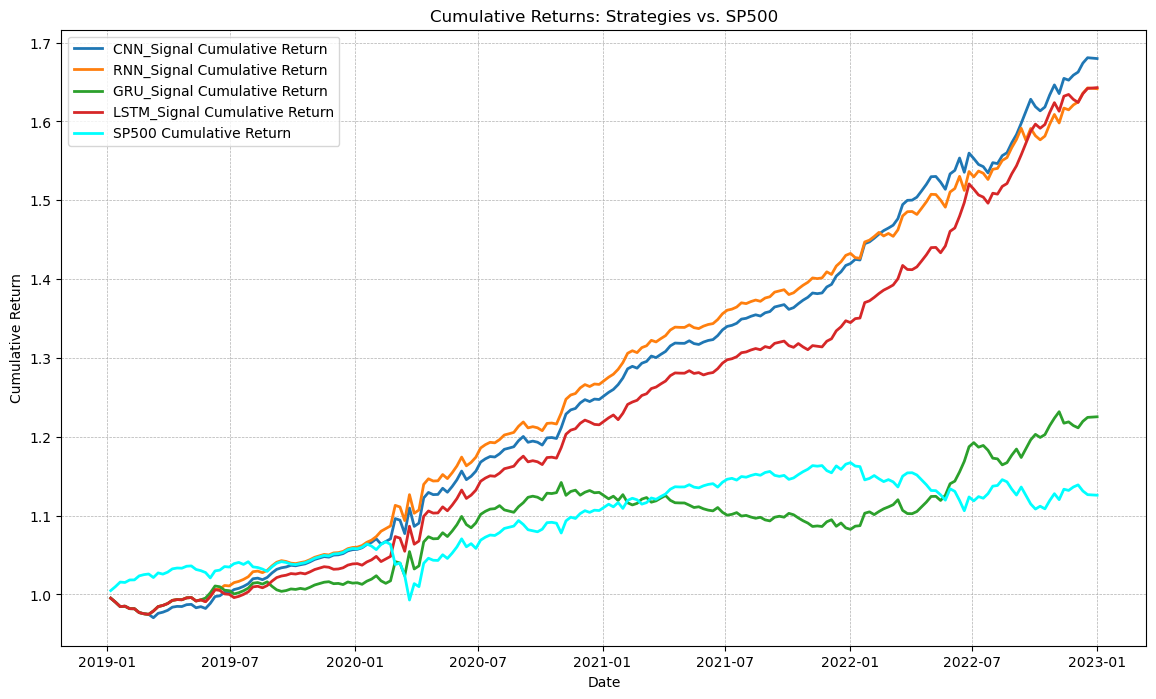

            Cumulative_Strategy_Return  Cumulative_SP500_Return
Date                                                           
2019-01-06                    0.995165                 1.004835
2019-01-13                    0.990154                 1.009895
2019-01-20                    0.984518                 1.015643
2019-01-27                    0.985033                 1.015112
2019-02-03                    0.981931                 1.018308
             Annualized Return  Sharpe Ratio  Information Ratio  Max Drawdown
CNN_Signal            0.868897      9.751740           3.793059     -0.024874
RNN_Signal            0.817682      9.099047           3.664366     -0.020959
GRU_Signal            0.277621      2.882937           0.640020     -0.052076
LSTM_Signal           0.819525      9.122301           3.387883     -0.020959


In [25]:
from BackTest.BackTest import backtest_strategy
import yfinance as yf

# Set the date range
start_date = '2010-01-01'
end_date = '2023-01-01'
def download_sp500_data(start_date, end_date):
    # Download S&P 500 data from Yahoo Finance
    sp500 = yf.download('^GSPC', start=start_date, end=end_date)
    return sp500

def calculate_returns(sp500_data):
    # Calculate daily returns
    sp500_data['Return'] = sp500_data['Adj Close'].pct_change()
    return sp500_data

# Download and process S&P 500 data
sp500_data = download_sp500_data(start_date, end_date)
sp500_data = calculate_returns(sp500_data)

# Drop NaN values and rename the column to SP500_Return
returns = sp500_data[['Return']].dropna().rename(columns={'Return': 'SP500_Return'})
# conver to weekly
returns = returns.resample('W').mean()



output_dir = "C:/Users/peter/outs/onlyme/000. Reseach/000. Egyetem/2024tavasz/Selected/Deep_Index_Strategy_2/0. Paper Folder/backtest_results"
os.makedirs(output_dir, exist_ok=True)

signal_names = ['CNN_Signal', 'RNN_Signal', 'GRU_Signal', 'LSTM_Signal']  # Add more signal names if available
cumulative_returns_df, performance_metrics_df = backtest_strategy(signal_table_sp, returns, signal_names, output_dir)
print(cumulative_returns_df.head())
print(performance_metrics_df)


## 7.3 SP Majority and VIX Majority and VIX SP

In [26]:
# Ensure the Date index is set for all DataFrames
sp_majority_signal_table.index = pd.to_datetime(sp_majority_signal_table.index)
vix_majority_signal_table.index = pd.to_datetime(vix_majority_signal_table.index)
combined_signal_table.index = pd.to_datetime(combined_signal_table.index)

# Select the specific columns to join
sp_combined = sp_majority_signal_table[['sp_combined_signal']]
vix_combined = vix_majority_signal_table[['vix_combined_signal']]
combined_signal = combined_signal_table[['combined_signal']]

# Join the tables on the Date index
merged_signals = sp_combined.join(vix_combined, how='inner').join(combined_signal, how='inner')

# Display the head of the merged table
print(merged_table.head())

NameError: name 'merged_table' is not defined

[*********************100%%**********************]  1 of 1 completed


Signal DataFrame head:
            sp_combined_signal vix_combined_signal combined_signal
Date                                                             
2019-04-21               Sell                Sell            Sell
2019-04-28               Sell                Sell            Sell
2019-05-05               Sell                Sell            Sell
2019-05-12               Sell                Sell            Sell
2019-05-19               Sell                Sell            Sell
SP500 Returns DataFrame head:
             SP500_Return
Date                    
2010-01-10      0.002636
2010-01-17     -0.001541
2010-01-24     -0.009796
2010-01-31     -0.003274
2010-02-07     -0.001296
Signal DataFrame Date Range:  2019-04-21 00:00:00  to  2023-01-01 00:00:00
SP500 Returns DataFrame Date Range:  2010-01-10 00:00:00  to  2023-01-01 00:00:00
Combined DataFrame head after join:
            sp_combined_signal vix_combined_signal combined_signal  \
Date                                         

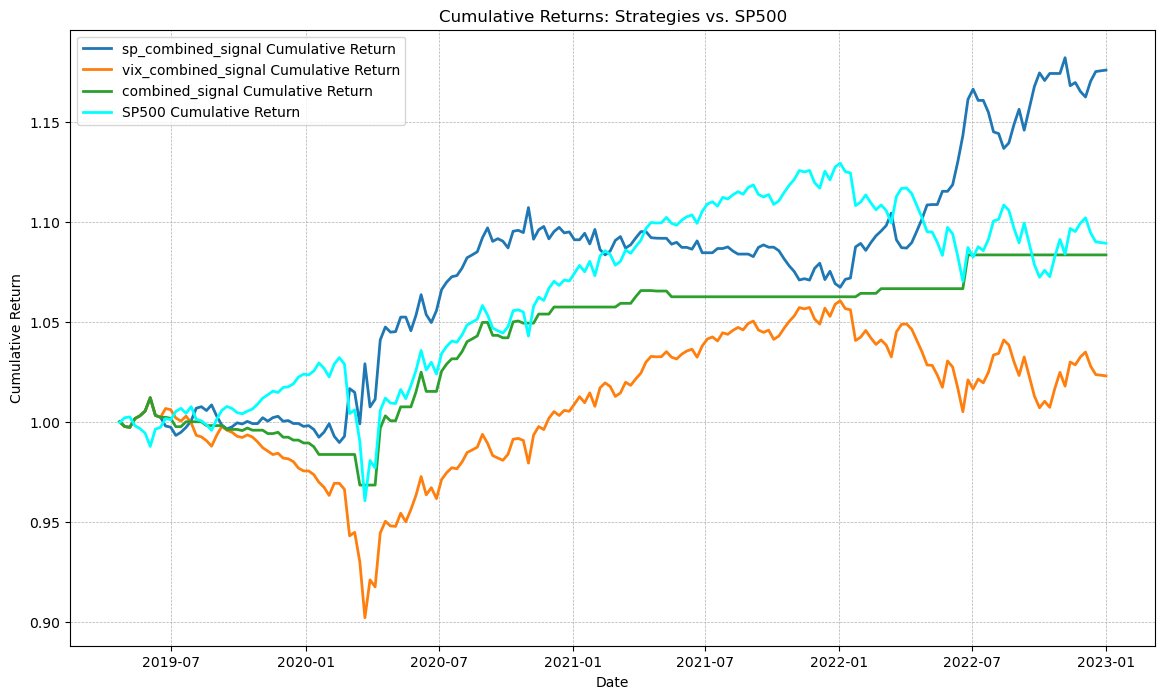

            Cumulative_Strategy_Return  Cumulative_SP500_Return
Date                                                           
2019-04-21                    1.000204                 0.999796
2019-04-28                    0.997808                 1.002191
2019-05-05                    0.997402                 1.002599
2019-05-12                    1.001768                 0.998210
2019-05-19                    1.003214                 0.996769
                     Annualized Return  Sharpe Ratio  Information Ratio  \
sp_combined_signal            0.234248      2.444264           0.599388   
vix_combined_signal           0.030132      0.301513          -2.245653   
combined_signal               0.109863      2.036419          -0.116062   

                     Max Drawdown  
sp_combined_signal      -0.035967  
vix_combined_signal     -0.108583  
combined_signal         -0.043098  


In [ ]:
from BackTest.BackTest import backtest_strategy
import yfinance as yf

# Set the date range
start_date = '2010-01-01'
end_date = '2023-01-01'
def download_sp500_data(start_date, end_date):
    # Download S&P 500 data from Yahoo Finance
    sp500 = yf.download('^GSPC', start=start_date, end=end_date)
    return sp500

def calculate_returns(sp500_data):
    # Calculate daily returns
    sp500_data['Return'] = sp500_data['Adj Close'].pct_change()
    return sp500_data

# Download and process S&P 500 data
sp500_data = download_sp500_data(start_date, end_date)
sp500_data = calculate_returns(sp500_data)

# Drop NaN values and rename the column to SP500_Return
returns = sp500_data[['Return']].dropna().rename(columns={'Return': 'SP500_Return'})
# conver to weekly
returns = returns.resample('W').mean()



output_dir = "C:/Users/peter/outs/onlyme/000. Reseach/000. Egyetem/2024tavasz/Selected/Deep_Index_Strategy_2/0. Paper Folder/backtest_results"
os.makedirs(output_dir, exist_ok=True)

signal_names = [ 'sp_combined_signal', 'vix_combined_signal', 'combined_signal']  # Add more signal names if available
cumulative_returns_df, performance_metrics_df = backtest_strategy(merged_signals, returns, signal_names, output_dir)
print(cumulative_returns_df.head())
print(performance_metrics_df)